C:\Users\hlapatha\AppData\Roaming\Python\Python312\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\hlapatha\AppData\Roaming\Python\Python312\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Loaded data: (2072, 32285)


C:\Users\hlapatha\AppData\Roaming\Python\Python312\site-packages\scanpy\preprocessing\_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
c:\Program Files\Python312\Lib\functools.py:907: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\hlapatha\AppData\Local\Temp\ipykernel_19496\1108360011.py:26: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.4)


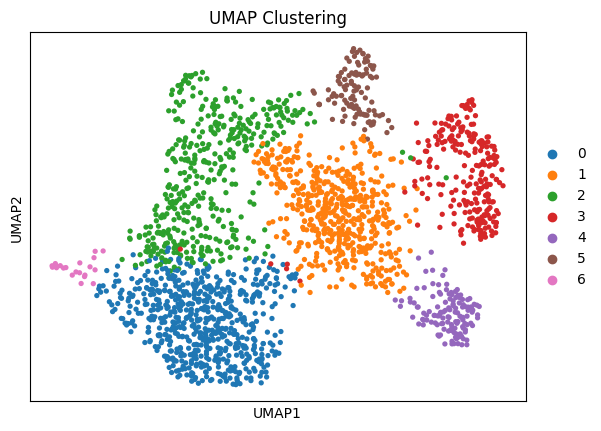

✅ Saved: 10x_processed_output.h5ad


In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import os

# ✅ STEP 1: Load raw 10x Genomics data (.h5)
adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")
print(f"✅ Loaded data: {adata.shape}")

# ✅ STEP 2: Basic AnnData formatting
adata.var_names_make_unique()

# ✅ STEP 3: Normalize and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

# ✅ STEP 4: PCA and neighbors
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

# ✅ STEP 5: UMAP and clustering
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)

# ✅ STEP 6: Visualize UMAP Clustering
sc.pl.umap(adata, color="leiden", title="UMAP Clustering")

# ✅ STEP 7: Save processed output
adata.write("10x_processed_output.h5ad")
print("✅ Saved: 10x_processed_output.h5ad")
